## Import the needed Libraries

In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd
from scipy.optimize import curve_fit
from scipy import integrate as integ

### Load MC simulation data
Data is stored in same folder as the nb.

To show some info about the loaded data uncoment:  %%capture% 


In [2]:
%%capture
### Open the files 
file_ee = uproot.open('ee.root')
ttree_name_ee = 'myTTree'

file_mm = uproot.open('mm.root')
ttree_name_mm = 'myTTree'

file_qq = uproot.open('qq.root')
ttree_name_qq = 'myTTree'

file_tt = uproot.open('tt.root')
ttree_name_tt = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
print('list of parameters ee:')
print('ee',file_ee[ttree_name_ee].keys())
print()
print('mm', file_mm[ttree_name_mm].keys())
print()
print('qq', file_qq[ttree_name_qq].keys())
print()
print('tt', file_tt[ttree_name_tt].keys())
print('________________________________________')

## Load branches
branches_ee = file_ee[ttree_name_ee].arrays()
branches_mm = file_mm[ttree_name_mm].arrays()
branches_qq = file_qq[ttree_name_qq].arrays()
branches_tt = file_tt[ttree_name_tt].arrays()

## Define an numpy array for 'Pcharged' for the 4 channels
var_Pcharged = 'Pcharged'
pchar_ee = ak.to_numpy(branches_ee[var_Pcharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
pchar_mm = ak.to_numpy(branches_mm[var_Pcharged])
pchar_qq = ak.to_numpy(branches_qq[var_Pcharged])
pchar_tt = ak.to_numpy(branches_tt[var_Pcharged])


print(f"\n\nArrays of type '{type(pchar_ee)}' defined for '{var_Pcharged}':\n\nee {pchar_ee} min: {pchar_ee.min()}, max: {pchar_ee.max()}")
print(f'mm {pchar_mm} min: {pchar_mm.min()}, max: {pchar_mm.max()}')
print(f'qq {pchar_qq} min: {pchar_qq.min()}, max: {pchar_qq.max()}')
print(f'tt {pchar_tt} min: {pchar_tt.min()}, max: {pchar_tt.max()}')
print()

## Define an numpy array for 'Ncharged' for the 4 channels
var_Ncharged = 'Ncharged'
nchar_ee = ak.to_numpy(branches_ee[var_Ncharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_mm = ak.to_numpy(branches_mm[var_Ncharged])
nchar_qq = ak.to_numpy(branches_qq[var_Ncharged])
nchar_tt = ak.to_numpy(branches_tt[var_Ncharged])


print(f"\n\nArrays of type '{type(nchar_ee)}' defined for '{var_Ncharged}':\n")
print(f"ee {nchar_ee} min: {nchar_ee.min()}, max: {nchar_ee.max()}")
print(f'mm {nchar_mm} min: {nchar_mm.min()}, max: {nchar_mm.max()}')
print(f'qq {nchar_qq} min: {nchar_qq.min()}, max: {nchar_qq.max()}')
print(f'tt {nchar_tt} min: {nchar_tt.min()}, max: {nchar_tt.max()}')
print()

## Define an numpy array for 'E_ecal' for the 4 channels
var_E_ecal = 'E_ecal'
E_ecal_ee = ak.to_numpy(branches_ee[var_E_ecal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_ecal_mm = ak.to_numpy(branches_mm[var_E_ecal])
E_ecal_qq = ak.to_numpy(branches_qq[var_E_ecal])
E_ecal_tt = ak.to_numpy(branches_tt[var_E_ecal])


print(f"\n\nArrays of type '{type(E_ecal_ee)}' defined for '{var_E_ecal}':\n")
print(f"ee {E_ecal_ee} min: {E_ecal_ee.min()}, max: {E_ecal_ee.max()}")
print(f'mm {E_ecal_mm} min: {E_ecal_mm.min()}, max: {E_ecal_mm.max()}')
print(f'qq {E_ecal_qq} min: {E_ecal_qq.min()}, max: {E_ecal_qq.max()}')
print(f'tt {E_ecal_tt} min: {E_ecal_tt.min()}, max: {E_ecal_tt.max()}')
print()

## Define an numpy array for 'E_hcal' for the 4 channels
var_E_hcal = 'E_hcal'
E_hcal_ee = ak.to_numpy(branches_ee[var_E_hcal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_hcal_mm = ak.to_numpy(branches_mm[var_E_hcal])
E_hcal_qq = ak.to_numpy(branches_qq[var_E_hcal])
E_hcal_tt = ak.to_numpy(branches_tt[var_E_hcal])


print(f"\n\nArrays of type '{type(E_hcal_ee)}' defined for '{var_E_hcal}':\n")
print(f"ee {E_hcal_ee} min: {E_hcal_ee.min()}, max: {E_hcal_ee.max()}")
print(f'mm {E_hcal_mm} min: {E_hcal_mm.min()}, max: {E_hcal_mm.max()}')
print(f'qq {E_hcal_qq} min: {E_hcal_qq.min()}, max: {E_hcal_qq.max()}')
print(f'tt {E_hcal_tt} min: {E_hcal_tt.min()}, max: {E_hcal_tt.max()}')
print()

## Define an numpy array for 'cos_thet' for the 4 channels
var_cos_thet = 'cos_thet'
cos_thet_ee = ak.to_numpy(branches_ee[var_cos_thet]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
cos_thet_mm = ak.to_numpy(branches_mm[var_cos_thet])
cos_thet_qq = ak.to_numpy(branches_qq[var_cos_thet])
cos_thet_tt = ak.to_numpy(branches_tt[var_cos_thet])


print(f"\n\nArrays of type '{type(cos_thet_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {cos_thet_ee} min: {cos_thet_ee.min()}, max: {cos_thet_ee.max()}")
print(f'mm {cos_thet_mm} min: {cos_thet_mm.min()}, max: {cos_thet_mm.max()}')
print(f'qq {cos_thet_qq} min: {cos_thet_qq.min()}, max: {cos_thet_qq.max()}')
print(f'tt {cos_thet_tt} min: {cos_thet_tt.min()}, max: {cos_thet_tt.max()}')
print()

## Define an numpy array for 'cos_thru' for the 4 channels
var_cos_thru = 'cos_thru'
cos_thru_ee = ak.to_numpy(branches_ee[var_cos_thru]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
cos_thru_mm = ak.to_numpy(branches_mm[var_cos_thru])
cos_thru_qq = ak.to_numpy(branches_qq[var_cos_thru])
cos_thru_tt = ak.to_numpy(branches_tt[var_cos_thru])


print(f"\n\nArrays of type '{type(cos_thru_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {cos_thru_ee} min: {cos_thru_ee.min()}, max: {cos_thru_ee.max()}")
print(f'mm {cos_thru_mm} min: {cos_thru_mm.min()}, max: {cos_thru_mm.max()}')
print(f'qq {cos_thru_qq} min: {cos_thru_qq.min()}, max: {cos_thru_qq.max()}')
print(f'tt {cos_thru_tt} min: {cos_thru_tt.min()}, max: {cos_thru_tt.max()}')
print()

## Define an numpy array for 'E_lep' for the 4 channels
var_E_lep = 'E_lep'
E_lep_ee = ak.to_numpy(branches_ee[var_E_lep]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_lep_mm = ak.to_numpy(branches_mm[var_E_lep])
E_lep_qq = ak.to_numpy(branches_qq[var_E_lep])
E_lep_tt = ak.to_numpy(branches_tt[var_E_lep])


print(f"\n\nArrays of type '{type(cos_thru_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {E_lep_ee} min: {E_lep_ee.min()}, max: {E_lep_ee.max()}")
print(f'mm {E_lep_mm} min: {E_lep_mm.min()}, max: {E_lep_mm.max()}')
print(f'qq {E_lep_qq} min: {E_lep_qq.min()}, max: {E_lep_qq.max()}')
print(f'tt {E_lep_tt} min: {E_lep_tt.min()}, max: {E_lep_tt.max()}')
print()


data_ee = pd.DataFrame({'ID': np.chararray(len(nchar_ee)),'Ncharged': nchar_ee, 'Pcharged': pchar_ee, 'E_ecal': E_ecal_ee, 'E_hcal': E_hcal_ee, 'E_lep':E_lep_ee, 'cos_thru': cos_thru_ee, 'cos_thet': cos_thet_ee})
data_mm = pd.DataFrame({'ID': np.chararray(len(nchar_mm)),'Ncharged': nchar_mm, 'Pcharged': pchar_mm, 'E_ecal': E_ecal_mm, 'E_hcal': E_hcal_mm, 'E_lep':E_lep_mm, 'cos_thru': cos_thru_mm, 'cos_thet': cos_thet_mm})
data_tt = pd.DataFrame({'ID': np.chararray(len(nchar_tt)),'Ncharged': nchar_tt, 'Pcharged': pchar_tt, 'E_ecal': E_ecal_tt, 'E_hcal': E_hcal_tt, 'E_lep':E_lep_tt, 'cos_thru': cos_thru_tt, 'cos_thet': cos_thet_tt})
data_qq = pd.DataFrame({'ID': np.chararray(len(nchar_qq)),'Ncharged': nchar_qq, 'Pcharged': pchar_qq, 'E_ecal': E_ecal_qq, 'E_hcal': E_hcal_qq, 'E_lep':E_lep_qq, 'cos_thru': cos_thru_qq, 'cos_thet': cos_thet_qq})

## Plot the data
With the simulated MC data one finds cuts with optimal seperation properties for the different channels. To get insights on where to cut one plots the data first in one dimension as a histogramm. After the one dimensional analysis correlations between parameters are studied by scatter ploting in two and three dimensions. 


First look at 1D histogramms for important measurement parameters.

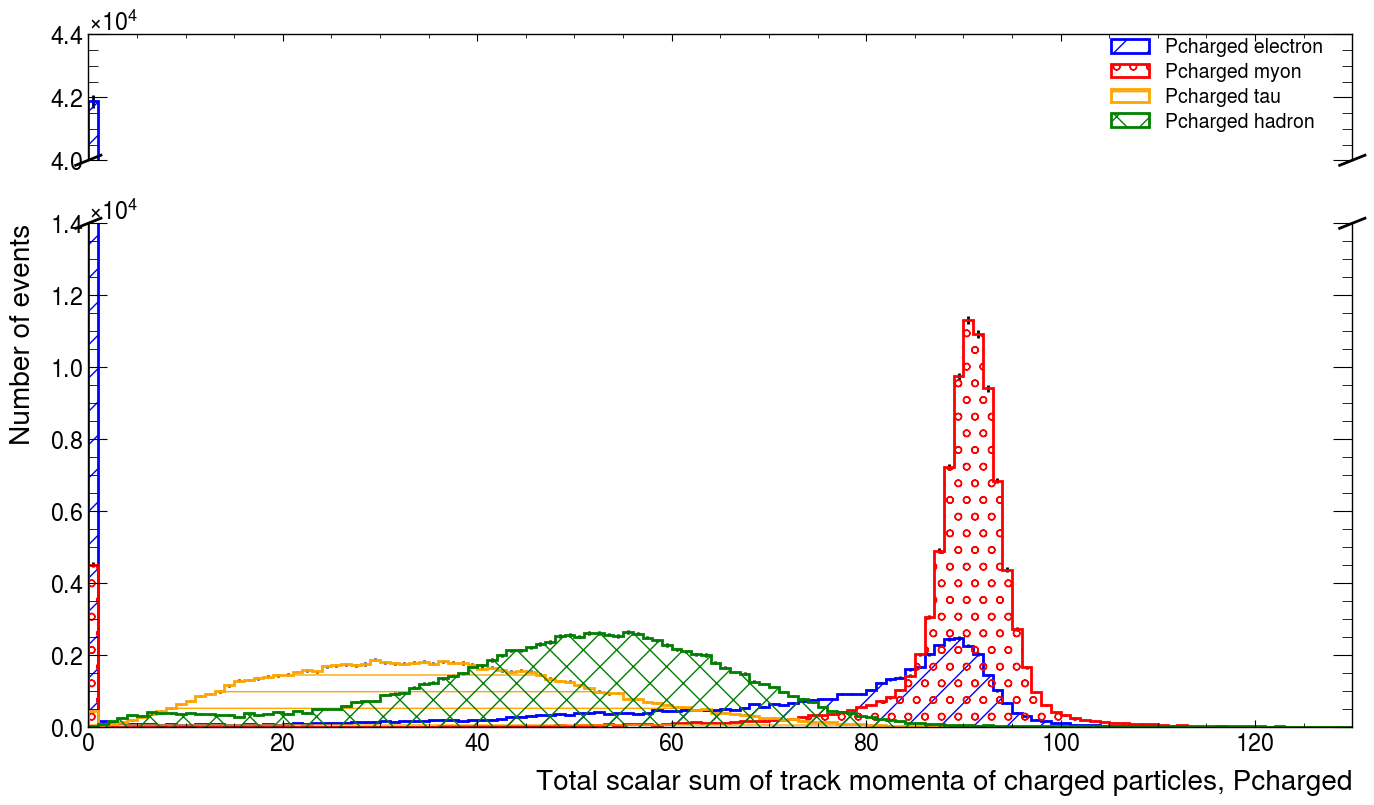

In [3]:
bins_pchar = np.linspace(0, 150, 151)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 

ratio = [1,4] # ratio of the two subplots

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,9), gridspec_kw={'height_ratios': ratio})

# plot the same data on both axes

bin_content_ee, bin_edges_ee, _ = ax.hist(pchar_ee,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged electron')
ax2.hist(pchar_ee,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars
error_sizes = np.sqrt(bin_content_ee)

ax.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none', color='black')
ax2.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none', color='black')

bin_content_mm, bin_edges_mm, _ = ax.hist(pchar_mm,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged myon')
ax2.hist(pchar_mm,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_mm)

ax.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none', color='black')
ax2.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none', color='black')

bin_content_tt, bin_edges_tt, _ = ax.hist(pchar_tt,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged tau')
ax2.hist(pchar_tt,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_tt)

ax.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none', color='black')
ax2.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none', color='black')

bin_content_qq, bin_edges_qq, _ = ax.hist(pchar_qq,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged hadron')
ax2.hist(pchar_qq,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars


error_sizes = np.sqrt(bin_content_qq)

ax.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none', color='black')
ax2.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none', color='black') 


# zoom-in / limit the view to different portions of the data
ax.set_ylim(4.0*10**4, 4.4*10**4)  # outliers only
ax2.set_ylim(0, 1.4*10**4)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()



d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*ratio[1], +d*ratio[1]), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d*ratio[1], +d*ratio[1]), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


### Show the plot on screen
plt.xlim(0,130)
ax.legend(loc = 4)
plt.xlabel('Total scalar sum of track momenta of charged particles, Pcharged')
plt.ylabel('Number of events')
plt.show()


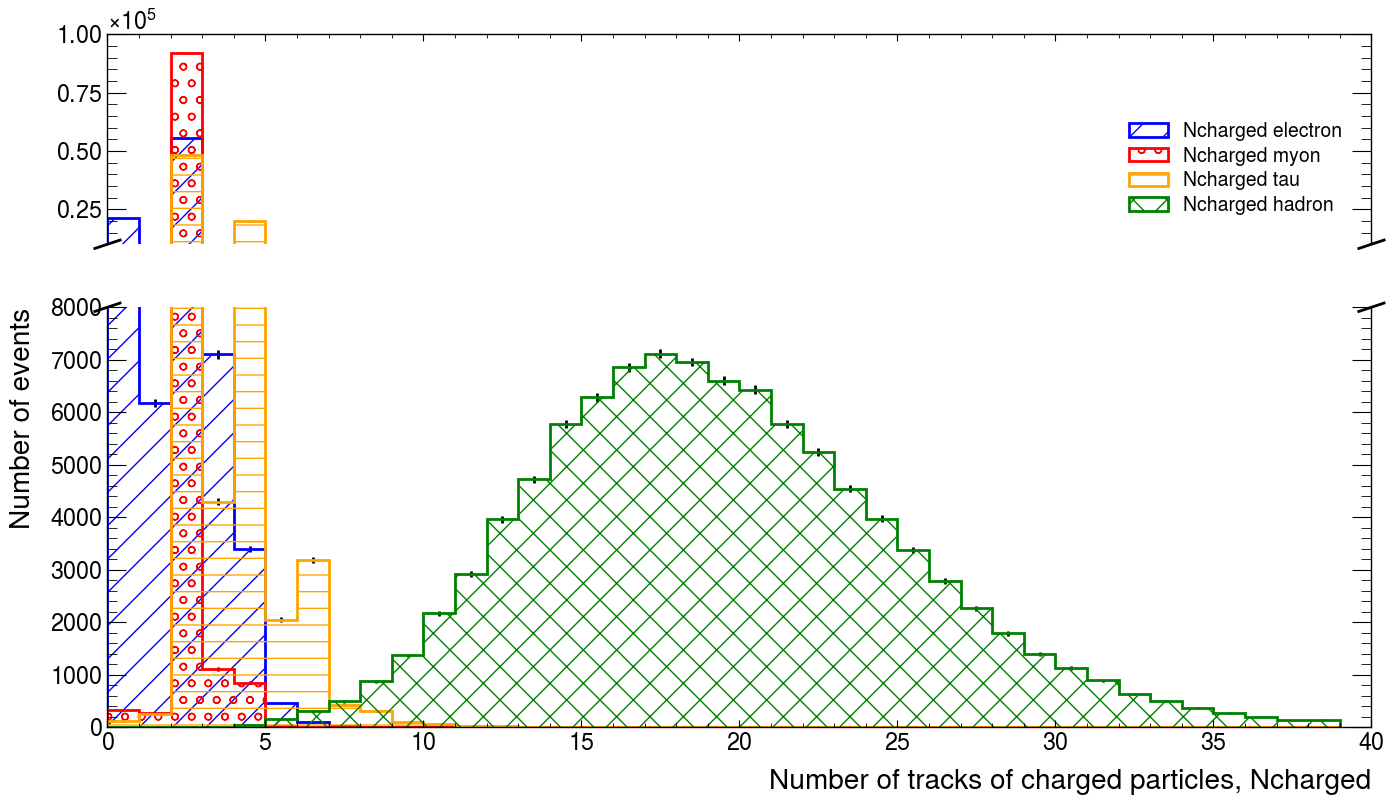

In [4]:

bins_nchar = np.linspace(0,39, 40)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 

ratio = [1,2] # ratio of the two subplots

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,9), gridspec_kw={'height_ratios': ratio})

#electron

bin_content_ee, bin_edges_ee, _ = ax.hist(nchar_ee,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Ncharged electron')
ax2.hist(nchar_ee,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_ee)

ax.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none', color = 'black')
ax2.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none', color = 'black')

#myon

bin_content_mm, bin_edges_mm, _ = ax.hist(nchar_mm,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Ncharged myon')
ax2.hist(nchar_mm,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_mm)

ax.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none', color = 'black')
ax2.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none', color = 'black')

#tau

bin_content_tt, bin_edges_tt, _ = ax.hist(nchar_tt,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Ncharged tau')
ax2.hist(nchar_tt,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_tt)

ax.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none', color = 'black')
ax2.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none', color = 'black')

#hadron

bin_content_qq, bin_edges_qq, _ = ax.hist(nchar_qq,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Ncharged hadron')
ax2.hist(nchar_qq,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_qq)

ax.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none', color = 'black')
ax2.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none', color = 'black')


# zoom-in / limit the view to different portions of the data
ax.set_ylim(1.0*10**4, 10*10**4)  # outliers only
ax2.set_ylim(0, 0.8*10**4)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()



d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*ratio[1], +d*ratio[1]), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d*ratio[1], +d*ratio[1]), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


### Show the plot on screen
plt.xlim(0,40)
ax.legend(loc = 4)
plt.xlabel('Number of tracks of charged particles, Ncharged')
plt.ylabel('Number of events')
plt.show()

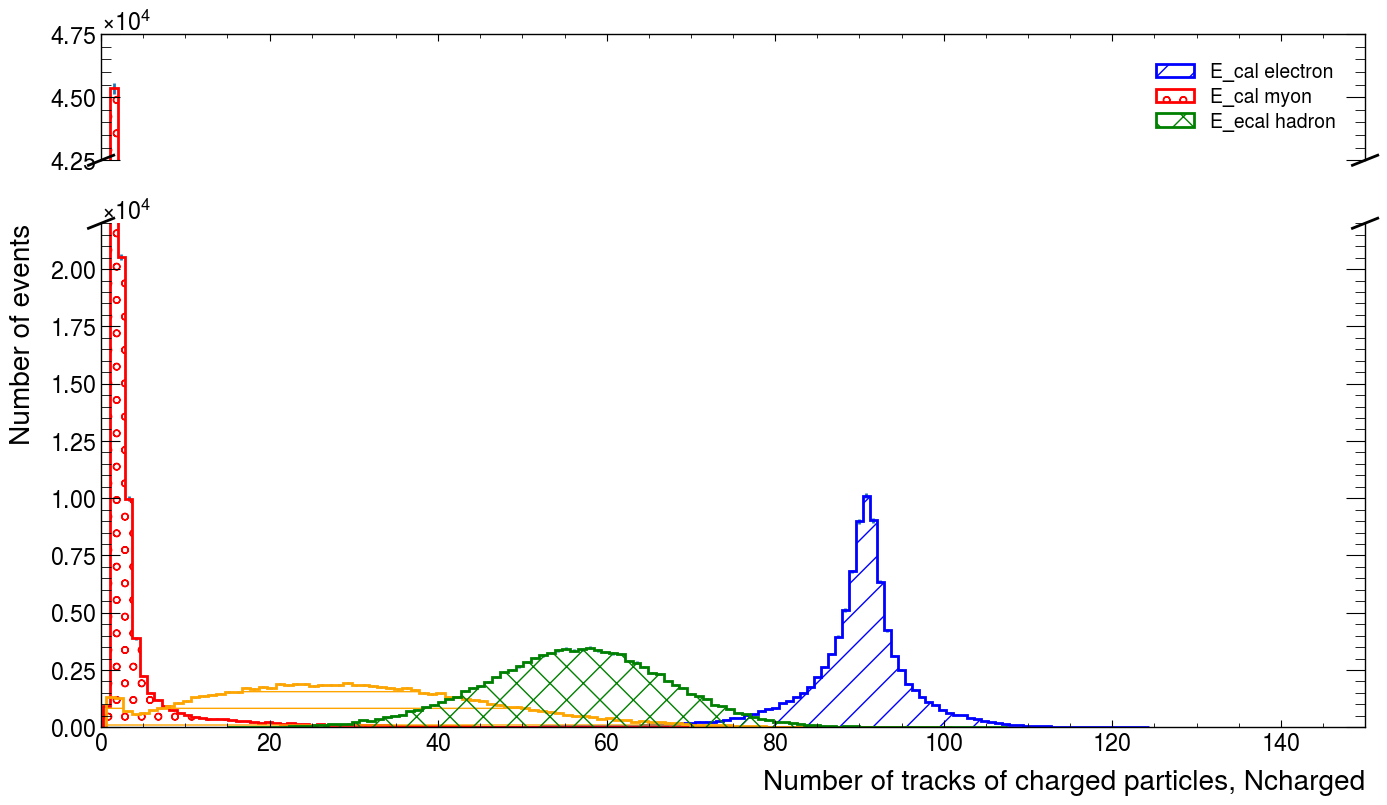

In [5]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
ratio = [1,4] # ratio of the two subplots

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(16,9), gridspec_kw={'height_ratios': ratio})

#electron

bin_content_ee, bin_edges_ee, _ = ax.hist(E_ecal_ee,bins=100, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='E_cal electron')
ax2.hist(E_ecal_ee,bins=100, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_ee)

ax.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none')
ax2.errorbar(mid_ee, bin_content_ee, yerr=error_sizes, fmt='none')

#myon

bin_content_mm, bin_edges_mm, _ = ax.hist(E_ecal_mm,bins=100, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='E_cal myon')
ax2.hist(E_ecal_mm,bins=100, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_mm)

ax.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none')
ax2.errorbar(mid_mm, bin_content_mm, yerr=error_sizes, fmt='none')

#tau

bin_content_tt, bin_edges_tt, _ = plt.hist(E_ecal_tt,bins=100, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='E_cal tau')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_tt)

ax.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none')
ax2.errorbar(mid_tt, bin_content_tt, yerr=error_sizes, fmt='none')

#hadron

bin_content_qq, bin_edges_qq, _ = ax.hist(E_ecal_qq,bins=100, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='E_ecal hadron')
ax2.hist(E_ecal_qq,bins=100, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='E_ecal hadron')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

error_sizes = np.sqrt(bin_content_qq)

ax.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none')
ax2.errorbar(mid_qq, bin_content_qq, yerr=error_sizes, fmt='none')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(4.25*10**4, 4.75*10**4)  # outliers only
ax2.set_ylim(0, 2.2*10**4)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()



d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*ratio[1], +d*ratio[1]), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d*ratio[1], +d*ratio[1]), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


### Show the plot on screen
plt.xlim(0,150)
ax.legend(loc = 4)
plt.xlabel('Number of tracks of charged particles, Ncharged')
plt.ylabel('Number of events')
plt.show()

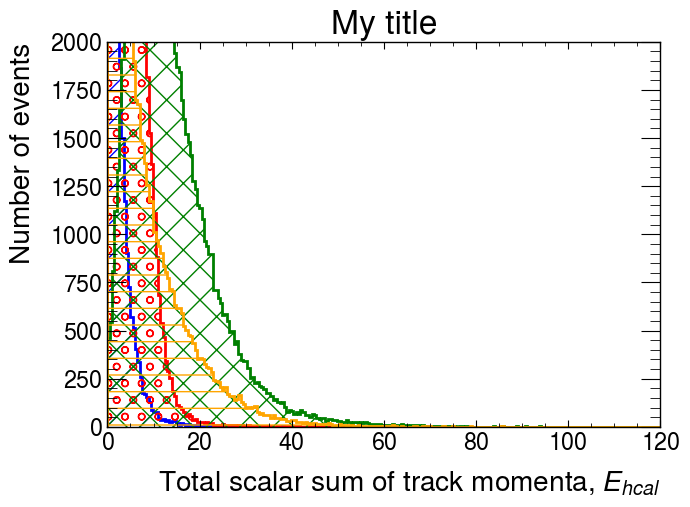

In [6]:
bins_Ehcal = np.linspace(0, 120, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_hcal_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_hcal_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_hcal_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_hcal_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
plt.ylim(0, 2*10**3)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()

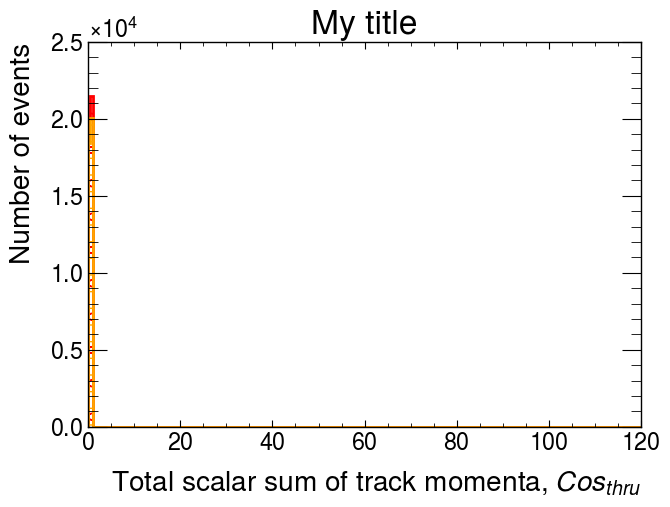

In [7]:
bins_cos_thru = np.linspace(0, 120, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

#bin_content_ee, bin_edges_ee, _ = plt.hist(cos_thru_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
#mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(cos_thru_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

#bin_content_qq, bin_edges_qq, _ = plt.hist(cos_thru_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
#mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(cos_thru_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $Cos_{thru}$')
plt.ylabel('Number of events')
plt.show()

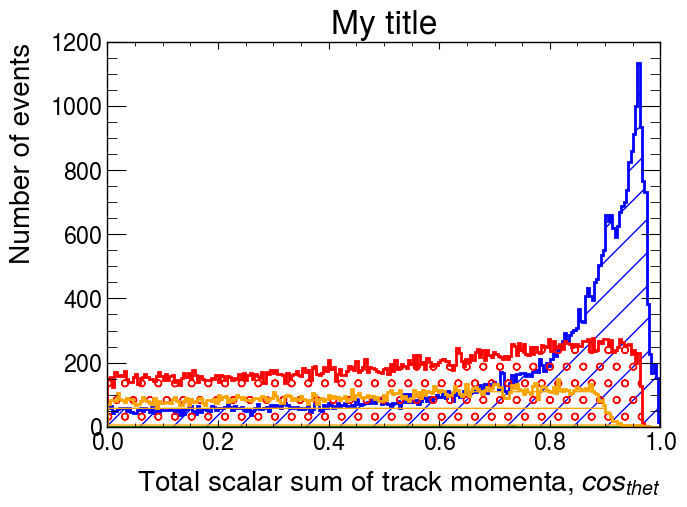

In [8]:
bins_Ehcal = np.linspace(0, 1, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(cos_thet_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(cos_thet_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(cos_thet_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(cos_thet_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $cos_{thet}$')
plt.ylabel('Number of events')
plt.show()

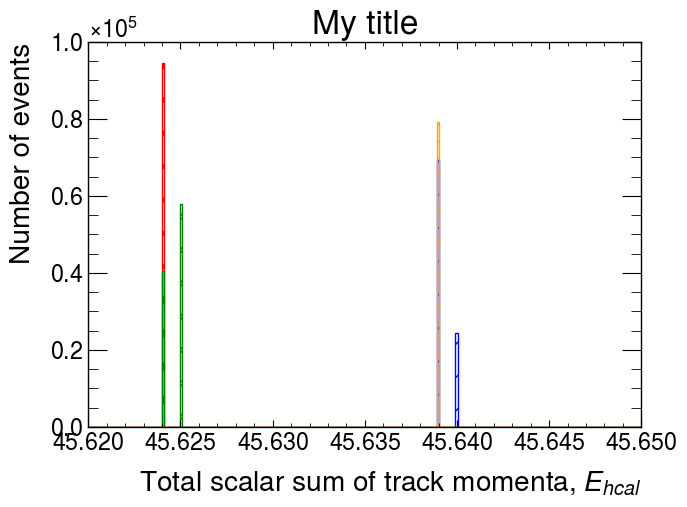

In [9]:
bins_Ehcal = np.linspace(45.62, 45.65, 242)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_lep_ee,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_lep_mm,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges_mm[1:] + bin_edges_mm[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_lep_qq,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges_qq[1:] + bin_edges_qq[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_lep_tt,bins=bins_Ehcal, histtype='step',  linewidth=1, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges_tt[1:] + bin_edges_tt[:-1]) #Calculate midpoint of the bars


#error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()

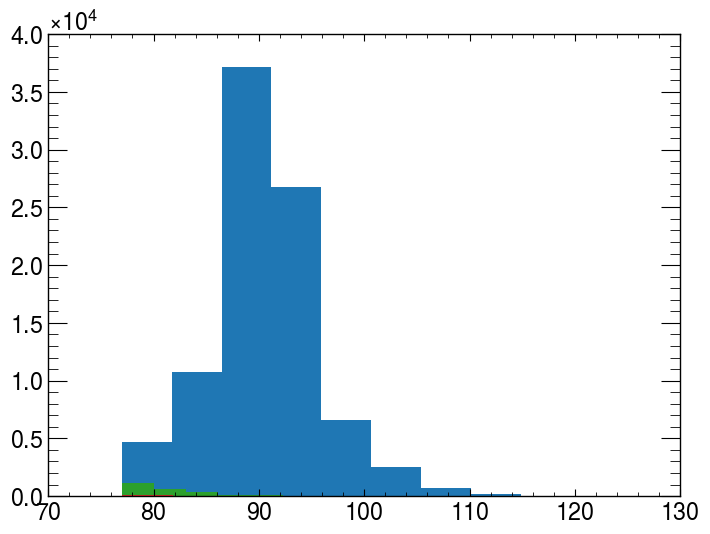

In [10]:

ee_mask_ee = E_ecal_ee >= 77 
ee_mask_mm = E_ecal_mm >= 77
ee_mask_qq = E_ecal_qq >= 77
ee_mask_tt = E_ecal_tt >= 77
#print(branches_mm['E_ecal'][ee_mask])
plt.hist(E_ecal_ee[ee_mask_ee])
plt.hist(E_ecal_mm[ee_mask_mm])
plt.hist(E_ecal_qq[ee_mask_qq])
plt.hist(E_ecal_tt[ee_mask_tt])
plt.show()

Scatter plot two data measurement parameters togather to see if there are correlations which can be usefull for cuts.

(0.0, 100.0)

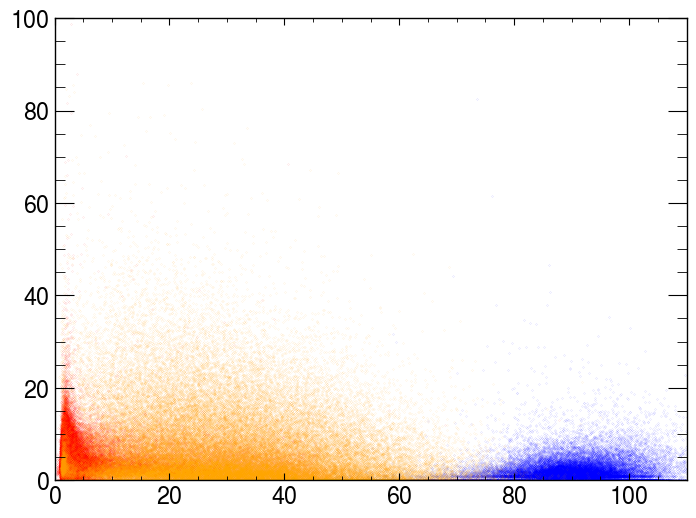

In [11]:
plt.plot(E_ecal_ee, E_hcal_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, E_hcal_mm, '.', color= 'r', markersize=0.1)
#plt.plot(E_ecal_qq, E_hcal_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, E_hcal_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,110)
plt.ylim(0,100)

(0.0, 120.0)

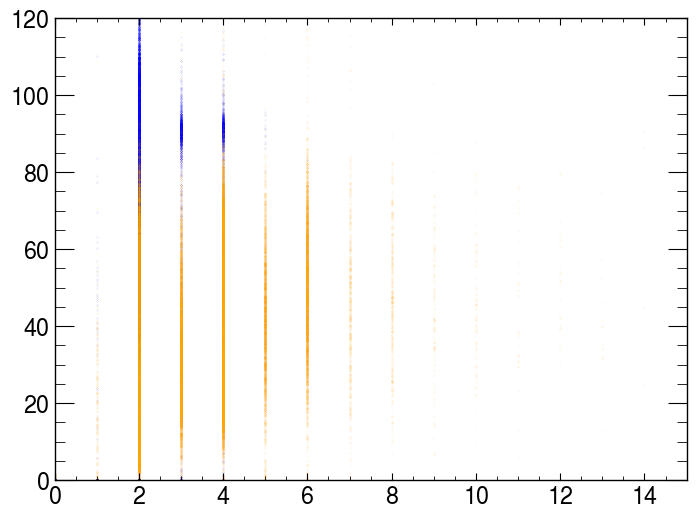

In [12]:
#plt.plot(nchar_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(nchar_mm, pchar_mm, '.', color= 'b', markersize=0.1)
#plt.plot(nchar_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(nchar_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,15)
plt.ylim(0,120)

(0.0, 140.0)

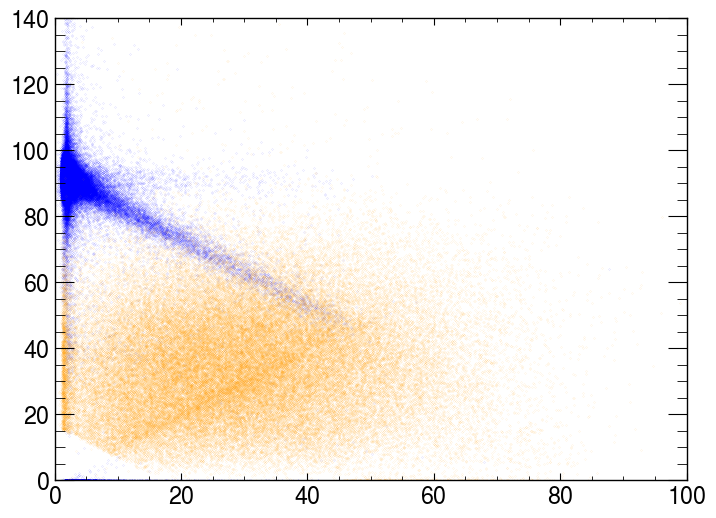

In [13]:
#plt.plot(E_ecal_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, pchar_mm, '.', color= 'b', markersize=0.1)
#plt.plot(E_ecal_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,140)

(0.0, 150.0)

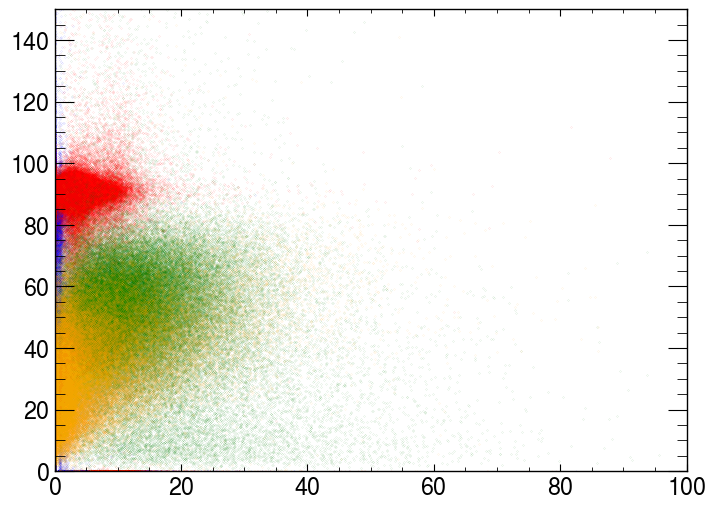

In [14]:
plt.plot(E_hcal_ee, pchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_hcal_mm, pchar_mm, '.', color= 'r', markersize=0.1)
plt.plot(E_hcal_qq, pchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_hcal_tt, pchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,150)

(0.0, 50.0)

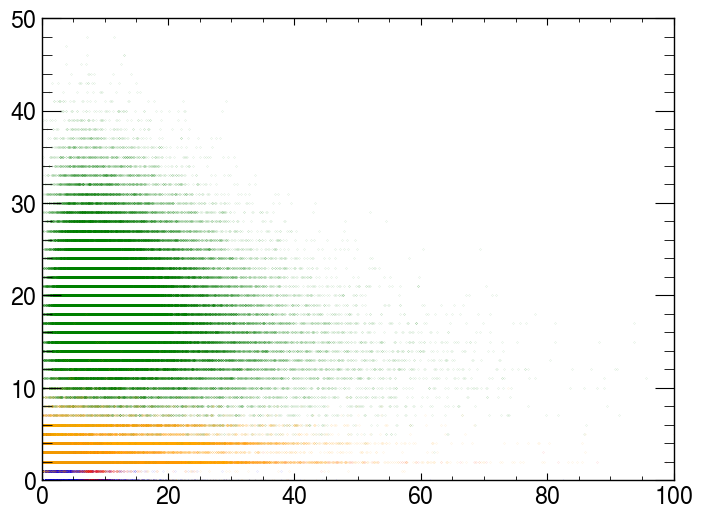

In [15]:
plt.plot(E_hcal_ee, nchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_hcal_mm, nchar_mm, '.', color= 'r', markersize=0.1)
plt.plot(E_hcal_qq, nchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_hcal_tt, nchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,50)

(0.0, 50.0)

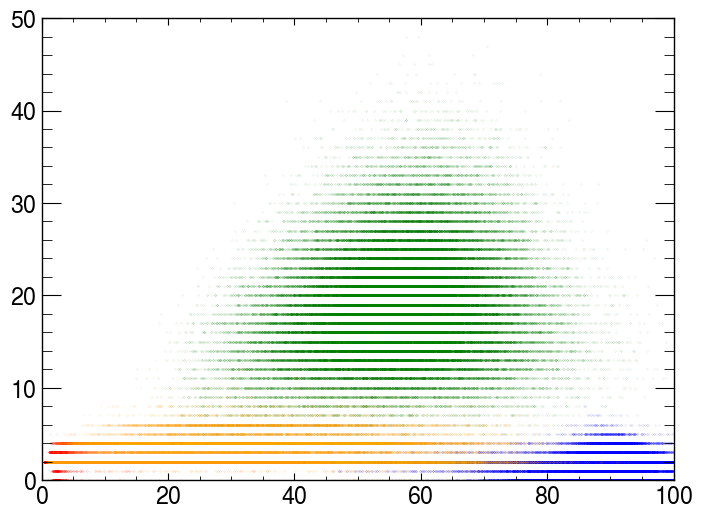

In [16]:
plt.plot(E_ecal_ee, nchar_ee, '.', color= 'b', markersize=0.1)
plt.plot(E_ecal_mm, nchar_mm, '.', color= 'r', markersize=0.1)
plt.plot(E_ecal_qq, nchar_qq, '.', color= 'green', markersize=0.1)
plt.plot(E_ecal_tt, nchar_tt, '.', color= 'orange', markersize=0.1)
plt.xlim(0,100)
plt.ylim(0,50)

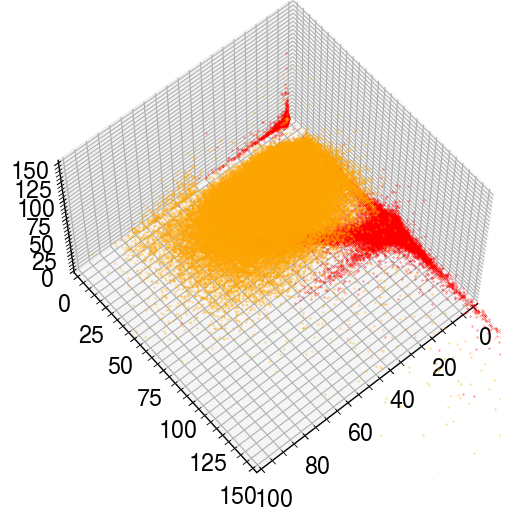

In [17]:
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(E_ecal_ee, nchar_ee, E_hcal_ee, '.', color= 'b', markersize=0.1)
ax.plot(E_ecal_mm, pchar_mm, E_hcal_mm, '.', color= 'r', markersize=0.5)
#ax.plot(E_ecal_qq, nchar_qq, E_hcal_qq, '.', color= 'green', markersize=0.5)
ax.plot(E_ecal_tt, pchar_tt, E_hcal_tt, '.', color= 'orange', markersize=0.5)
ax.set_xlim(0, 100)
ax.set_ylim(0, 150)
ax.set_zlim(0, 150)
ax.view_init(elev=60., azim=50)

## Introduce particle identification system
Array with number of events qual to number of entrances 

Entrances are:
* not calssified = 'NC'
* electron = 'ee' 
* myon = 'mm' 
* hadron = 'qq' 
* tau = 'tt' 

The cuts are the applied first cutting away the hadrons then the electrons and at last the muons and taus. This step by step cutting helps to find better cuts by removing the data, which can be cut easily first. Tis then opens up the possibility to cut the data in new locations.


In [18]:
def classify_event_in_4CH(Ncharged, Pcharged, E_ecal, E_hcal, cos_thet):
    if len(Ncharged)==len(Pcharged)==len(E_ecal)==len(E_hcal):
        #print(Ncharged)
        PI = np.chararray((len(Ncharged),1), itemsize=2)[:]
        PI[:] = 'NC'      # create start PI array with all events unclassified
        NC = 0      
        ee = 0 
        es = 0     
        qq = 0
        mm = 0
        tt = 0
        #print(f'Classification for Energy {meanenergy[I]}:\n')                 
        for i in range(len(Ncharged)):
            
            if (Ncharged[i] >= 7) & (E_ecal[i]>20):
                PI[i] = "qq"
                qq += 1
            elif (E_ecal[i] >= 60): # electron s channel cut
                PI[i] = "ee"
                ee += 1
            elif (70<=Pcharged[i] <= 110) & (E_ecal[i]<20):
                PI[i] = "mm"
                mm += 1
            elif (Pcharged[i] < 10) & (E_ecal[i] < 10):
                PI[i] = "mm"
                mm += 1
            elif (E_ecal[i] < 100) & (1 < Pcharged[i] < 75):
                PI[i] = "tt"
                tt += 1
            else:
                PI[i] = "NC"
                NC += 1
        L = len(Ncharged) 
        for i in range(len(Ncharged)):
            if (PI[i] == b'ee') & (-0.9 < cos_thet[i] < 0.1): # electron s channel cut
                PI[i] = "es"
                es += 1 
        #print(PI)
        print('ee, mm, tt, qq, NC,len(Ncharged)')
        print(ee, mm, tt, qq, NC,len(Ncharged))
        print()
    else:
        print('Unequaly long input arrays')
    return [[ee, mm, tt, qq, NC, len(Ncharged)], PI, [ee * 0.95/len(Ncharged), mm/len(Ncharged), tt/len(Ncharged), qq/len(Ncharged), NC/len(Ncharged)],[ee*0.95, mm, tt, qq, NC, len(Ncharged)]] # the efficiancy of the s channel cut is chosen to be 0.95 hence it has to be multiplied on the ee eficiency to get the efficiency of the s_channel selection


In [19]:
classify_ee = classify_event_in_4CH(nchar_ee, pchar_ee, E_ecal_ee, E_hcal_ee, cos_thet_ee)
classify_mm = classify_event_in_4CH(nchar_mm, pchar_mm, E_ecal_mm, E_hcal_mm, cos_thet_mm)
classify_tt = classify_event_in_4CH(nchar_tt, pchar_tt, E_ecal_tt, E_hcal_tt, cos_thet_tt)
classify_qq = classify_event_in_4CH(nchar_qq, pchar_qq, E_ecal_qq, E_hcal_qq, cos_thet_qq)
efficiency_matrix = np.array([[np.round(classify_ee[0][i]/ classify_ee[0][5],6) for i in range(5)],
                     [np.round(classify_mm[0][i]/ classify_mm[0][5],6) for i in range(5)],
                     [np.round(classify_tt[0][i]/ classify_tt[0][5],6) for i in range(5)],
                     [np.round(classify_qq[0][i]/ classify_qq[0][5],6) for i in range(5)]])
efficiency_matrix = np.array([classify_ee[2], classify_mm[2], classify_tt[2], classify_qq[2]])                     
data_ee.loc[:, ['ID']] = classify_ee[1]
data_mm.loc[:, ['ID']] = classify_mm[1]
data_tt.loc[:, ['ID']] = classify_tt[1]
data_qq.loc[:, ['ID']] = classify_qq[1]

ee, mm, tt, qq, NC,len(Ncharged)
93245 0 100 25 432 93802

ee, mm, tt, qq, NC,len(Ncharged)
2 89447 3236 0 1696 94381

ee, mm, tt, qq, NC,len(Ncharged)
3190 613 73371 903 1137 79214

ee, mm, tt, qq, NC,len(Ncharged)
97 5 418 98027 16 98563



In [20]:
efficiency_matrix

array([[9.44358862e-01, 0.00000000e+00, 1.06607535e-03, 2.66518838e-04,
        4.60544551e-03],
       [2.01311705e-05, 9.47722529e-01, 3.42865619e-02, 0.00000000e+00,
        1.79697185e-02],
       [3.82571263e-02, 7.73853107e-03, 9.26237786e-01, 1.13995001e-02,
        1.43535234e-02],
       [9.34935016e-04, 5.07289754e-05, 4.24094234e-03, 9.94561854e-01,
        1.62332721e-04]])

In [21]:
error_efficiency_matrix = np.array([[np.round( np.sqrt( classify_ee[0][i] / classify_ee[0][5]**2 + classify_ee[0][i]**2 / classify_ee[0][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_mm[0][i] / classify_mm[0][5]**2 + classify_mm[0][i]**2 / classify_mm[0][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_qq[0][i] / classify_qq[0][5]**2 + classify_qq[0][i]**2 / classify_qq[0][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_tt[0][i] / classify_tt[0][5]**2 + classify_tt[0][i]**2 / classify_tt[0][5]**3) ,4) for i in range(5)]])
                           
error_efficiency_matrix = np.array([[np.round( np.sqrt( classify_ee[3][i] / classify_ee[3][5]**2 + classify_ee[3][i]**2 / classify_ee[3][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_mm[3][i] / classify_mm[3][5]**2 + classify_mm[3][i]**2 / classify_mm[3][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_qq[3][i] / classify_qq[3][5]**2 + classify_qq[3][i]**2 / classify_qq[3][5]**3) ,4) for i in range(5)],
                           [np.round( np.sqrt( classify_tt[3][i] / classify_tt[3][5]**2 + classify_tt[3][i]**2 / classify_tt[3][5]**3) ,4) for i in range(5)]])

In [22]:
error_efficiency_matrix

array([[0.0044, 0.    , 0.0001, 0.0001, 0.0002],
       [0.    , 0.0044, 0.0006, 0.    , 0.0004],
       [0.0001, 0.    , 0.0002, 0.0045, 0.    ],
       [0.0007, 0.0003, 0.0047, 0.0004, 0.0004]])

(array([213.,   0.,   1.,   0.,   1.,   2.,   2.,   2.,   2.,   1.,   3.,
          1.,   5.,   2.,   4.,   3.,   5.,   2.,   5.,   6.,   6.,   5.,
          4.,   6.,   5.,   4.,   1.,   6.,   6.,   7.,  11.,  14.,  13.,
         15.,  15.,  16.,  24.,  28.,  23.,  33.,  27.,  32.,  24.,  40.,
         36.,  31.,  35.,  38.,  49.,  47.,  55.,  60.,  76.,  77.,  73.,
         95.,  82.,  88.,  74.,  94., 112., 126., 135., 107., 123., 122.,
        136., 178., 181., 176., 107.,  94.,  96.,  66.,  57.,  34.,  35.,
         17.,   9.,  10.,  10.,   8.,   5.,   7.,   3.,  10.,  15.,  17.,
         16.,  32.,  32.,  32.,  25.,  12.,  14.,   5.,   3.,   4.,   2.,
          5.,   2.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
         64.,  47.,  49.,  34.,  41.,  32.,  30.,  31.,  28.,  32.,  25.,
         17.,  23.,  19.,  15.,  14.,  11.,  16.,  17.,  15.,   9.,   9.,
         10.,   7.,  11.,   4.,  10.,   8.,  11.,  10.,   9.,   8.,   4.,
          6.,   7.,   4.,  10.,   8., 

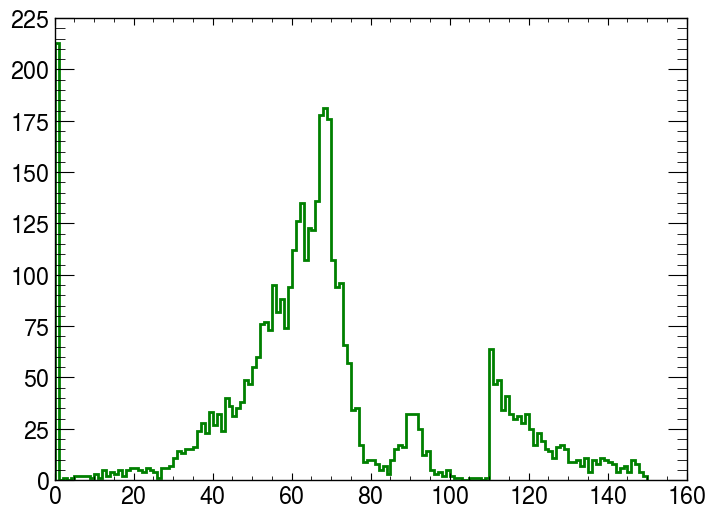

In [23]:
plt.hist(data_mm.loc[data_mm['ID']!= b'mm']['Pcharged'],bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='green', label='Pcharged')


### Here is a problem in the code caused by the random number generator of numpy if it does not run through just run both again unitl it works

In [27]:
matrix = efficiency_matrix[:, 0:4]

error_matrix = error_efficiency_matrix[:, 0:4]
### Number of toy experiments to be done
ntoy = 5000

### Create numpy matrix of list to append elements of inverted toy matrices
inverse_toys = np.empty((4,4))

# Create toy efficiency matrix out of gaussian-distributed random values
for i in range(0,ntoy,1):
    toy_matrix = np.zeros((4,4))
    #np.random.seed(14)
    toy_matrix = np.random.normal(matrix,error_matrix,size=(4,4))
    
    ### Invert toy matrix
    inverse_toy = np.linalg.inv(toy_matrix)
    
    #print(inverse_toys.item(0,0),inverse_toy.item(0,0))
    # Append values
    inverse_toys = np.dstack((inverse_toys,inverse_toy))

print(inverse_toys)

[[[ 1.06012677e+00  1.05348334e+00  1.05607875e+00 ...  1.05154346e+00
    1.05719686e+00  1.05989508e+00]
  [ 1.03270330e-05  1.00479536e-05  8.36277314e-06 ...  1.05270209e-05
    9.22720834e-06  1.07594836e-05]
  [-1.26921174e-03 -1.23646870e-03 -1.03019840e-03 ... -1.29255627e-03
   -1.13722448e-03 -1.31892068e-03]
  [-3.72449413e-04 -4.46091034e-04 -2.82736448e-04 ... -1.94030588e-04
   -1.24117988e-04 -3.54597199e-04]]

 [[ 1.54954268e-03  1.53791062e-03  1.51787870e-03 ...  1.58663976e-03
    1.59443610e-03  1.55536359e-03]
  [ 1.05490876e+00  1.04881330e+00  1.05925688e+00 ...  1.04586920e+00
    1.05703695e+00  1.05404118e+00]
  [-3.89078128e-02 -3.86859795e-02 -3.79777148e-02 ... -3.99308792e-02
   -4.02127294e-02 -3.89949342e-02]
  [ 4.16694109e-04  3.44940961e-04  1.43248533e-04 ...  7.90682152e-04
    5.03621972e-04  2.18152468e-04]]

 [[-4.36468298e-02 -4.35588332e-02 -4.37962005e-02 ... -4.35180683e-02
   -4.34280060e-02 -4.37090915e-02]
  [-8.81685582e-03 -8.76344376e-0

[[(1.0392604620794028, 1.0788584146165117), (6.161949377857612e-06, 1.3774922781646653e-05), (-0.0016828831789915109, -0.0007552974742599948), (-0.0006930345319527498, 0.00015236958154865344)], [(0.0014404472062688914, 0.001680327429136862), (1.0356688488499004, 1.0753729359109991), (-0.04194375212822326, -0.036219901494338326), (-0.0002521156593128953, 0.001150526005885112)], [(-0.044686128956212795, -0.042803629557197534), (-0.008986229298091368, -0.008651558291912444), (1.0791129815082268, 1.0810290607208797), (-0.03180205415183174, 0.006969581782766292)], [(-0.003912531403063617, 0.00227377823704964), (-0.00129664495951761, 0.0012650578690474234), (-0.024875856825341228, 0.01553750257393336), (1.0039014171459049, 1.0071433088181334)]]
Erros for the inverse matrix:
[[4.94952640e-03 9.55335753e-07 1.17133586e-04 1.05782231e-04]
 [3.02788318e-05 4.95431677e-03 7.12740926e-04 1.74847932e-04]
 [2.38591845e-04 4.16251171e-05 2.48224587e-04 4.84284802e-03]
 [7.88938426e-04 3.23806347e-04 

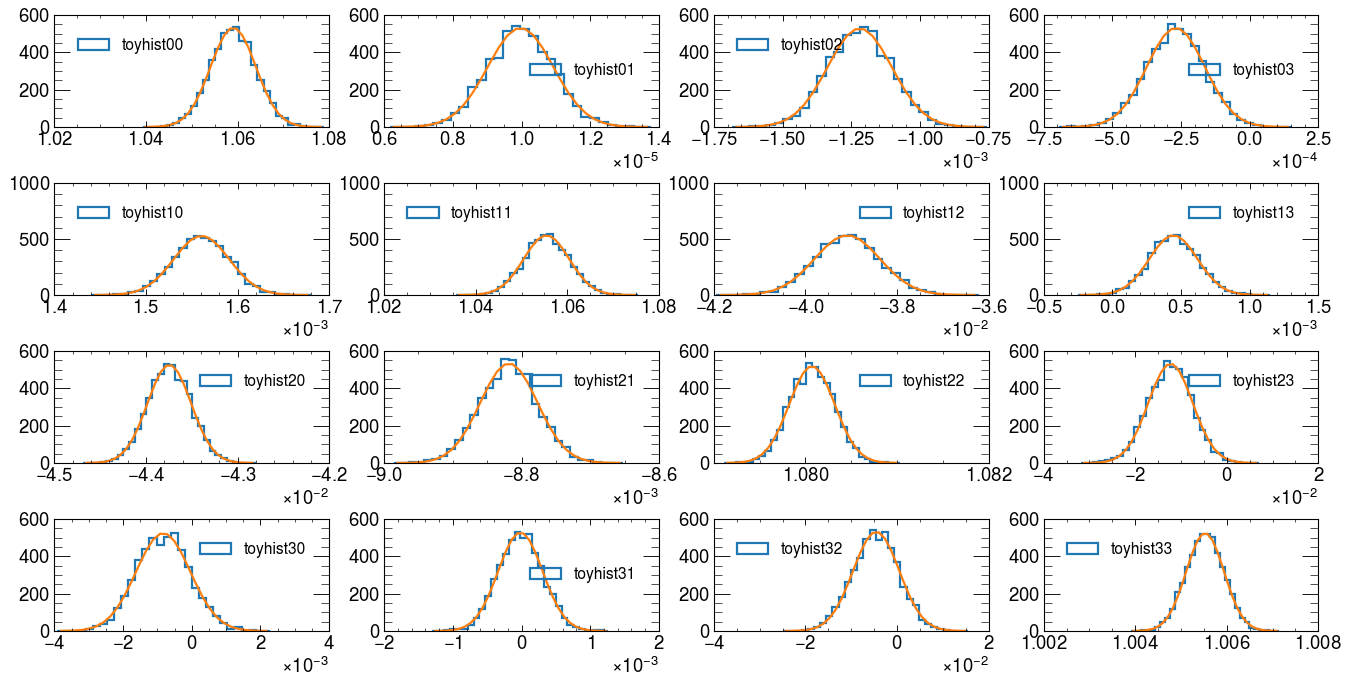

In [28]:
# Define gaussian function to fit to the toy distributions:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


inverse_errors = np.zeros((4,4))
inverse_means = np.zeros((4,4))


fig = plt.figure(figsize=(20, 10),dpi=80)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
ax00 = plt.subplot(4,4,1)
ax01 = plt.subplot(4,4,2)
ax02 = plt.subplot(4,4,3)
ax03 = plt.subplot(4,4,4)

ax10 = plt.subplot(4,4,5)
ax11 = plt.subplot(4,4,6)
ax12 = plt.subplot(4,4,7)
ax13 = plt.subplot(4,4,8)

ax20 = plt.subplot(4,4,9)
ax21 = plt.subplot(4,4,10)
ax22 = plt.subplot(4,4,11)
ax23 = plt.subplot(4,4,12)

ax30 = plt.subplot(4,4,13)
ax31 = plt.subplot(4,4,14)
ax32 = plt.subplot(4,4,15)
ax33 = plt.subplot(4,4,16)

axes = [[ax00,ax01,ax02,ax03],
        [ax10,ax11,ax12,ax13],
        [ax20,ax21,ax22,ax23],
        [ax30,ax31,ax32,ax33]]

## IMPORTANT! Find suitable ranges to fit/plot gaussian distributions successfully!

ranges = [[(np.mean(inverse_toys[j,k,:]) - 4*np.std(inverse_toys[j,k,:]), np.mean(inverse_toys[j,k,:]) + 4*np.std(inverse_toys[j,k,:])) for k in range(0,4,1)] for j in range(0,4,1)]
print(ranges)
#ranges = [[(inverse_toy[row][col] - error_efficiency_matrix[row][col], inverse_toy[row][col] + error_efficiency_matrix[row][col]) for col in range(len(inverse_toy[0]))] for row in range(len(inverse_toy))]

# Fill histograms for each inverted matrix coefficient:
for j in range(0,4,1):
    for k in range(0,4,1):
        
        # Diagonal and off-diagonal terms have different histogram ranges
        hbins, hedges, _ = axes[j][k].hist(inverse_toys[j,k,:],bins=30,range=ranges[j][k],  histtype='step', linewidth=2, label=f'toyhist{j}{k}')
        axes[j][k].legend()

        ## Guess initial parameters of the fit by taking random value from hist and std
        _p0 = [ntoy/10.,np.mean(inverse_toys[j,k,:]),np.std(inverse_toys[j,k,:])]

        # Get the fitted curve
        h_mid = 0.5*(hedges[1:] + hedges[:-1]) #Calculate midpoints for the fit
        coeffs, _ = curve_fit(gauss, h_mid, hbins, maxfev=100000, p0 = _p0)
        h_fit = gauss(h_mid, *coeffs)
        
        axes[j][k].plot(h_mid, h_fit,label=f'Fit{j}{k}')

        inverse_means[j,k] = coeffs[1]
        inverse_errors[j,k] = abs(coeffs[2])

print(f"Erros for the inverse matrix:\n{inverse_errors}")

There small deveations in the uncertainties due to it beeing computed numerically. The matrix used for further analysis is the following:

In [29]:
np.array([[4.87418322e-03, 9.46085523e-07, 1.15537576e-04, 1.06662703e-04],
          [3.01977613e-05, 4.92789228e-03, 7.24046709e-04, 1.80927276e-04],
          [2.31450425e-04, 4.15124017e-05, 2.40414630e-04, 5.00395757e-03],
          [7.65248259e-04, 3.12274846e-04, 5.14290685e-03, 4.08665348e-04]])



array([[4.87418322e-03, 9.46085523e-07, 1.15537576e-04, 1.06662703e-04],
       [3.01977613e-05, 4.92789228e-03, 7.24046709e-04, 1.80927276e-04],
       [2.31450425e-04, 4.15124017e-05, 2.40414630e-04, 5.00395757e-03],
       [7.65248259e-04, 3.12274846e-04, 5.14290685e-03, 4.08665348e-04]])

## 2. Separate s- and t-channel of the ee-branch ##

for the branch of $e^+e^-$-creation both s- and t-channels are possible, since the inital particles are also $e^+$ and $e^-$. The rest only posesses only s-channels.\
The different channels show a dependency on the angle $\theta$ betweeen incoming and outgoing $e^+$.\
For the s-channel the dependency is 
\begin{align}
\frac{d\sigma_s}{d\Omega} \propto 1+\cos^2(\theta)
\end{align}
and for the t-channel 
\begin{align}
\frac{d\sigma_t}{d\Omega} \propto \frac{1}{(1-\cos(\theta))^2},
\end{align}
so therefore a sum of these dependencies is fitted to the histogram plot of the angle "cos_thet". The detection rates towards the $\cos(\theta)=\pm1$ break in because around the path of the incoming LEP-beam there are less/no detectors, so a fit range of $\cos(\theta) \in[-0.9, 0.9]$ was chosen.

Coefficients a,b: [111.1865185   12.58174787]
Variance matricies: [[ 1.10416806 -0.04941872]
 [-0.04941872  0.01001559]]


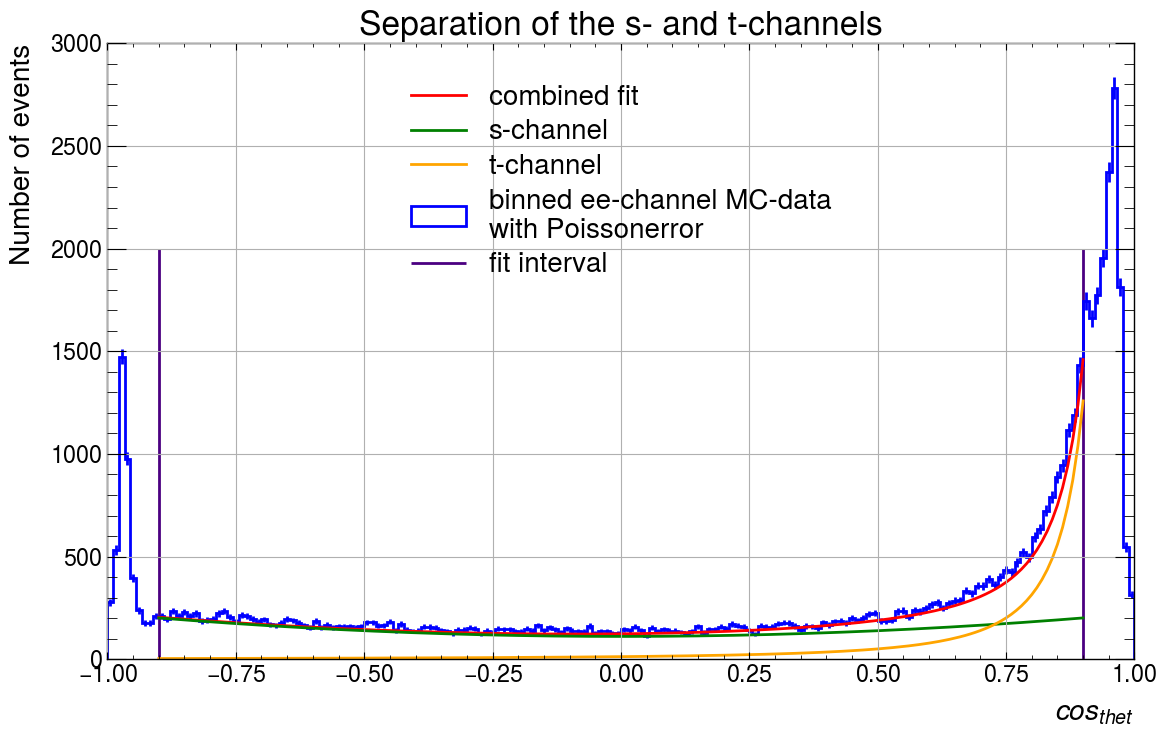

In [30]:
## define fit function, create bin spacing, set plot environment

def ee_channel_separation(x,a,b):
    return a*(1+x**2) + b*(1-x)**(-2)


bins_theta = np.linspace(-0.9, 0.9, 181) # bin spacing for the fit
bins_theta2 = np.linspace(-1, 1, 181) # bin spacing for the whole range [-1,1]


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(13,8))

## Data needed for the fit

bin_content_ee, bin_edges_ee, _ = plt.hist(cos_thet_ee,bins=bins_theta, histtype='step', alpha= 0.0, linewidth=2,hatch='|', edgecolor='b')
mid_ee = 0.5*(bin_edges_ee[1:] + bin_edges_ee[:-1]) #Calculate midpoint of the bars fot the fit
# upper hist just saves the data for the fit, but whole data should be shown in plot (hist below), therefore alpha= 0.0

coeff, variance_matrix = curve_fit(ee_channel_separation, mid_ee, bin_content_ee)
print("Coefficients a,b:",coeff)
print("Variance matricies:",variance_matrix)


## Data needed for the plot
bin_content_ee2, bin_edges_ee2, _ = plt.hist(cos_thet_ee,bins=bins_theta2, histtype='step', color= 'blue',  linewidth=2, edgecolor='b', label='binned ee-channel MC-data\nwith Poissonerror')
mid_ee2 = 0.5*(bin_edges_ee2[1:] + bin_edges_ee2[:-1])
bin_errors= np.sqrt(bin_content_ee2)


## Plot the rest of the data and configure plot

plt.errorbar(mid_ee2, bin_content_ee2, yerr=bin_errors, c='b', fmt='none')
plt.plot(bins_theta,ee_channel_separation(bins_theta,*coeff),label="combined fit", c='r')
plt.plot(bins_theta,coeff[0]*(1+bins_theta**2),label="s-channel", c='g')
plt.plot(bins_theta,coeff[1]*(1-bins_theta)**(-2),label="t-channel", c='orange')
plt.vlines(-0.9, 0, 2000, color='#4B0081', label= 'fit interval')
plt.vlines(0.9, 0, 2000, color='#4B0081')

plt.title('Separation of the s- and t-channels')
plt.legend(loc=9, fontsize= 20)
plt.grid()
plt.xlabel('$cos_{thet}$')
plt.ylabel('Number of events')
#plt.savefig('s_t_channelseparation.png', bbox_inches='tight', dpi=400)
plt.show()

**The scaling for the real data** to get the number of s-channel events from the $e^+e^-$-channel is considered by the fraction
\begin{align}
s_{ratio}= \frac{N_s}{N_s+N_t}
\end{align}
Since this is a fraction, is could also be expressed by the area fraction (i.e. integrals over the channels) like
\begin{align}
s_{ratio}= \frac{\int_{\cos(\theta_1)}^{\cos(\theta_2)}a(1+\cos^2(\theta)) \,d\cos(\theta)}{\int_{\cos(\theta_1)a}^{\cos(\theta_2)}a(1+\cos^2(\theta))+\frac{b}{(1-\cos(\theta))^2} \,d\cos(\theta)}\hspace{0.2cm},
\end{align}

The fits made in range $\cos(\theta) \in[-0.9, 0.9]$ above show the behaviour of the s- and t-channel dependencies quite well. At the corners, the MC-data differs from theory, especially from the diverging t-channel term, having downgoing count towards $\cos(\theta)=1$. This is not unexpected, since around the beam entries ($\cos(\theta)=\pm1$) there are less/no detectors. 
Focussing on the range $\cos(\theta) \in[-0.9, 0.9]$ one wants to find a cut, where first many s-channel events are detected and second the events of the t-channel are low in number. Letter condition motivates to find a usual confidence interval containing 95% of s-channel events and only 5% unwanted t-channel events by calculating the following ratio to be equal to 5%

\begin{align}
\frac{\int_{-0.9}^{\cos(\theta)}\frac{b}{(1-\cos'(\theta))^2} \,d\cos'(\theta)}{\int_{-0.9}^{\cos(\theta)}a(1+\cos'^2(\theta)) \,d\cos'(\theta)} = 0.05
\end{align}
which is to be found for $\cos(\theta)= 0.05, i.e. the interval [-0.9, 0.05], effectivly leading to a new cut with these edges. Inside the interval are faily few events in comparison to all events, but makes sure, there are at least 95% s-channel events. To reconstruct the number of actual s-channel events, the number of electrons found in this cut interval can be weighted by the factor 
\begin{align}
w= \frac{\int_{-1}^{1}a(1+\cos'^2(\theta)) \,d\cos'(\theta)}{\int_{-0.9}^{0.05}a(1+\cos'^2(\theta)) \,d\cos'(\theta)} \hspace{0.2cm},
\end{align}
bringing the cutted electrons back up to the number of all s-channel electrons found over the whole angle range, but with only 5% unwanted events. Together this yields 
\begin{align}
s_{ratio, final}= w\cdot s_{ratio} =...= \frac{\int_{-1}^{1}(1+\cos'^2(\theta)) \,d\cos'(\theta)}{1.05\cdot \int_{-0.9}^{0.05}(1+\cos'^2(\theta)) \,d\cos'(\theta)} \hspace{0.2cm},
\end{align}

95 0.049920581282075494


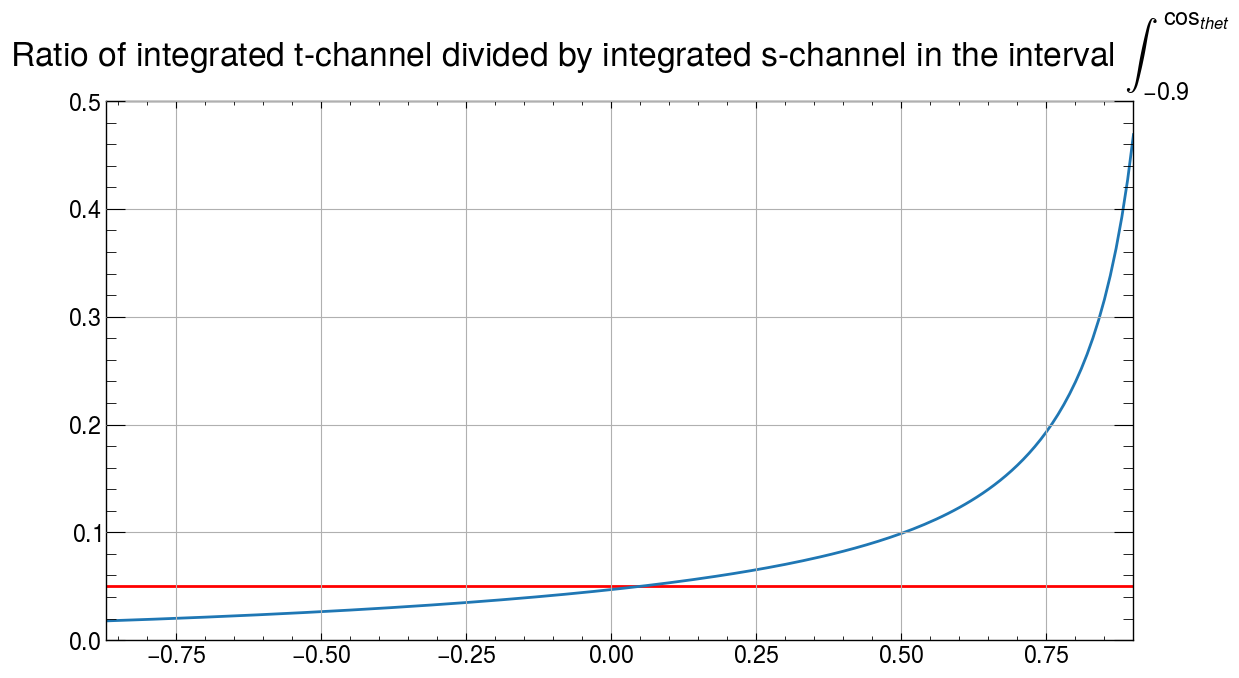

In [31]:
import scipy.integrate as integ
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(13,7))

ratio= np.zeros(len(bins_theta))
for i in range(1,len(bins_theta)):
    ratio[i]= integ.quad(lambda x: coeff[1]*(1-x)**(-2), -0.9, bins_theta[i])[0]/integ.quad(lambda y: coeff[0]*(1+y**2), -0.9, bins_theta[i])[0]

#integ.quad(lambda x: coeff[1]*(1-bins_theta2)**(-2), bins_theta2[0], bins_theta2[i])[0]


for i in range(len(bins_theta)-1):
    if ratio[i] < 0.75 and abs(ratio[i]-0.05) < 0.0001:
        print(i, ratio[i])

plt.plot(bins_theta, ratio)
plt.hlines(0.05, -0.9, 0.9, colors='r', label='confidence level of 5%')
plt.ylim(0, 0.5)
plt.xlim(-0.87, 0.9)
plt.grid()
plt.title(r'Ratio of integrated t-channel divided by integrated s-channel in the interval $\int_{-0.9}^{ \hspace{0.7} \cos_{thet}}$')
#plt.savefig('s_t_channel_confidence.png', bbox_inches='tight', dpi=400)
plt.show()

In [34]:
s_ratio= integ.quad(lambda x: coeff[0]*(1+x**2), -1, 1)[0]/ (1.05*integ.quad(lambda x: coeff[0]*(1+x**2), -0.9, 0.05)[0])
print('The s-channel ratio is {0}'.format(s_ratio))


The s-channel ratio is 2.128745885949112


**The error of $s_{ratio, final}$** needs to be calculated by gaussian error propagation. The only error hides in the factor 1.05 with
\begin{align}
1.05 = 1+ 0.05 = 1+ \frac{b}{a}\frac{\int_{-0.9}^{\cos(\theta)}\frac{1}{(1-\cos'(\theta))^2} \,d\cos'(\theta)}{\int_{-0.9}^{\cos(\theta)}(1+\cos'^2(\theta)) \,d\cos'(\theta)}\hspace{0.2cm},
\end{align}
with the statistical errors of parameters a,b are known from the covariance matrix of the fit.
\begin{align}
\sigma_{0.05}= |0.05|\cdot \sqrt{\left( \frac{\sigma_a}{a}\right)^2 + \left( \frac{\sigma_b}{b}\right)^2}
\end{align}

leading to 
\begin{align}
\sigma_{s_{ratio,final}}= |s_{ratio,final}|\cdot \frac{\sigma_{0.05}}{0.05} = |s_{ratio,final}|\cdot \sqrt{\left( \frac{\sigma_a}{a}\right)^2 + \left( \frac{\sigma_b}{b}\right)^2}
\end{align}

In [33]:
sigma_ratio= abs(s_ratio)*np.sqrt((variance_matrix[0][0]/coeff[0])**2+ (variance_matrix[1][1]/coeff[1])**2) 

print('The error of the s-ratio is {0}'.format(sigma_ratio))
print(sigma_ratio/s_ratio)

The error of the s-ratio is 0.02120790063274807
0.009962626714974212
